Desafio 28: Análise de Acessos a um Site
📂 Dataset: Dados simulados de sessões de usuários em páginas de um site.
Colunas: Usuario, Data, Página, Tempo_Sessao_Seg

🎯 Tarefas:

Limpe os dados da coluna Tempo_Sessao_Seg, tratando valores como "erro", "" e NaN.

Qual a média de tempo de sessão por página?

Qual foi o dia com mais acessos?

Qual usuário acumulou o maior tempo total no site?

Crie um gráfico de linha mostrando a evolução diária da quantidade de acessos.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
df = pd.read_csv("dia_28_acessos_site.csv")
df.head()

,Usuario,Data,Página,Tempo_Sessao_Seg
0,usuario_16,2025-01-23,contato,846.06
1,usuario_44,2025-01-31,sobre,378.59
2,usuario_100,2025-02-19,produtos,342.63
3,usuario_88,2025-03-15,home,135.86
4,usuario_20,2025-02-03,produtos,360.61


In [15]:
#Limpe os dados da coluna Tempo_Sessao_Seg, tratando valores como "erro", "" e NaN.
df["Tempo_Sessao_Seg"] = pd.to_numeric(df["Tempo_Sessao_Seg"], errors="coerce")
df["Tempo_Sessao_Seg"] = df["Tempo_Sessao_Seg"].fillna(df.groupby("Página")["Tempo_Sessao_Seg"].transform("mean"))
df["Tempo_Sessao_Seg"].isna().sum()

0

In [27]:
#Qual a média de tempo de sessão por página?
mediaSessaoPagina = df.groupby("Página")["Tempo_Sessao_Seg"].mean().sort_values(ascending=False)
print(mediaSessaoPagina.round(2).to_string())

Página
login       476.04
contato     462.14
blog        448.92
produtos    441.94
home        418.18
sobre       402.52


In [24]:
#Qual foi o dia com mais acessos?
maisAcessoDia = df["Data"].value_counts()
print(f"O dia com mais acessos foi {maisAcessoDia.idxmax()}, com {maisAcessoDia.max()} acessos.")

O dia com mais acessos foi 2025-02-03, com 13 acessos.


In [28]:
#Qual usuário acumulou o maior tempo total no site?
usuarioMaiorTempo = df.groupby("Usuario")["Tempo_Sessao_Seg"].sum().sort_values(ascending=False)
print(f"O usuário que mais acumulou tempo foi {usuarioMaiorTempo.idxmax()}, com {usuarioMaiorTempo.max():.2f} segundos.")

O usuário que mais acumulou tempo foi usuario_47, com 5323.12 segundos.


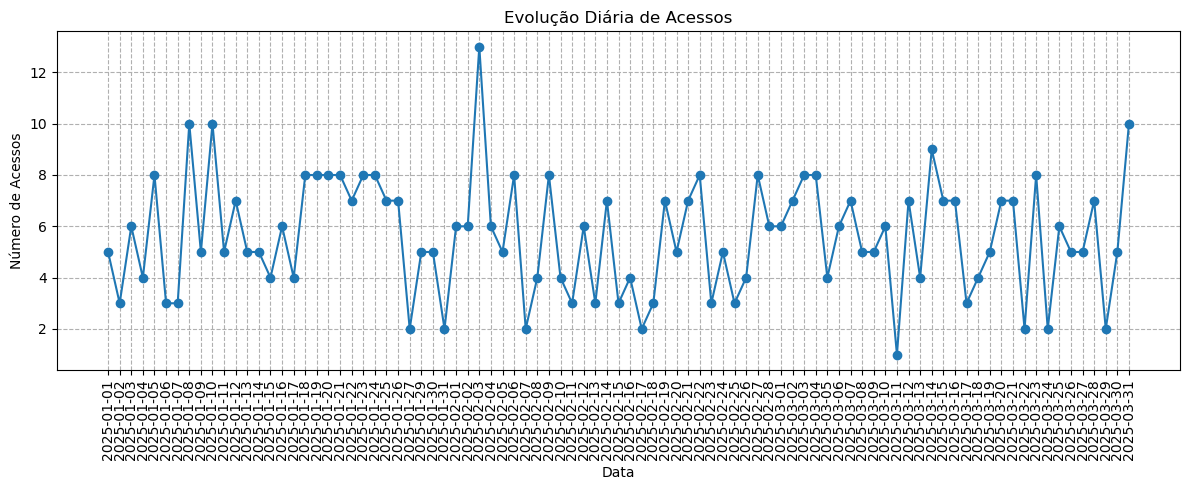

In [55]:
#Crie um gráfico de linha mostrando a evolução diária da quantidade de acessos.
acessosDiarios = df["Data"].value_counts().sort_index()

plt.figure(figsize=(12, 5))
plt.plot(acessosDiarios.index, acessosDiarios.values, marker="o")
plt.title("Evolução Diária de Acessos")
plt.xlabel("Data")
plt.ylabel("Número de Acessos")
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(linestyle="--")
plt.show()